# Implementation Practice.1-2
## Forward and Backward Propagation with $y = \theta x$

이번 Practice1-2에서는 datapoint마다의 loss로 parameter를 update하지 않고, datapoint 5개의 loss들을 이용하여 cost를 구하고, 이 cost부터 backpropagation으로 parameter를 update하는 과정을 연습한다.

먼저 전 Practice의 Dataset Generation 부분과 Node Implmentation 부분을 가져오자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1, 2, 3, 4, 5])

class minus_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x - y
        return self.z
    
    def backward(self, dL):
        return dL, -1*dL

class mul_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    def backward(self, dL):
        return self.y*dL, self.x*dL

class square_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x, self.z = x, x*x
        return self.z
    
    def backward(self, dL):
        return 2*self.x*dL

우리가 Practice1-1에서 구한 loss들은 다음과 같이 나타낼 수 있다.

$l^{(1)}, l^{(2)}, l^{(3)}, l^{(4)}, l^{(5)}$

이때 Cost는 다음과 같이 정리된다.

$J(\theta) = \frac{1}{N} \sum_{i=1}^{N} l^{(i)}$

따라서 이번 Practice1-2에서는 $l^{(i)}$들을 구한 뒤, 위의 식을 이용하여 cost를 구하고

cost node에서부터 backprogation을 진행한다.

먼저 cost를 구하는 node를 만들어보자.

이때 Vectorization을 이용하기 위하여 cost_node()는 $l^{(i)}$들을 ndarray로 받아 평균치를 구해 최종 cost를 구할 것이고, backward에서는 datapoint 개수와 일치하는 차원의 ndarray를 return한다.

즉, forward()에서는 np.mean()을 이용하고

backward()에서는 (N,) ndarray를 만들어 gradient를 return한다.

In [2]:
class cost_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x = x
        self.z = self.x.mean()
        return self.z
        
    def backward(self):
        return 1/len(self.x)*np.ones(shape=(len(self.x)))
        
c_node = cost_node()
test_gradient = np.array([2, 3, 4, 5, 6])
print("cost node(forward): ", c_node.forward(test_gradient))
print("cost node(backward): ", c_node.backward())

cost node(forward):  4.0
cost node(backward):  [0.2 0.2 0.2 0.2 0.2]


**Expected Output:**

cost node(forward):  4.0

cost node(backward):  [0.2 0.2 0.2 0.2 0.2]

이 cost_node를 이용하여 forward propagation, backward propagation을 구현해보자.

Text(0.5, 1.0, '$\\theta$')

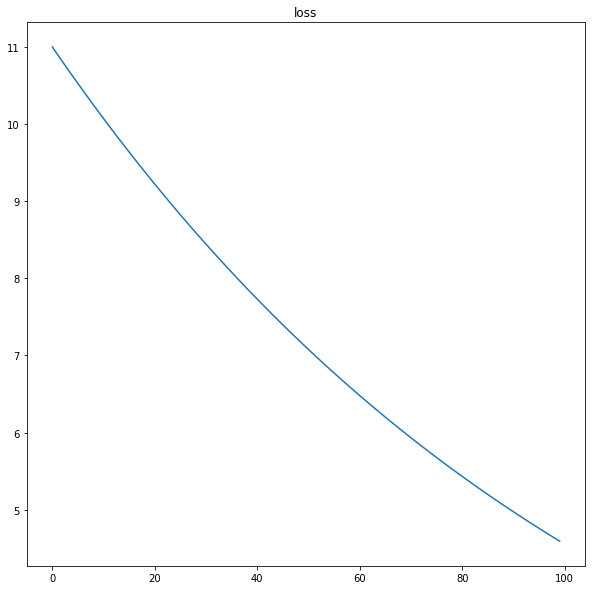

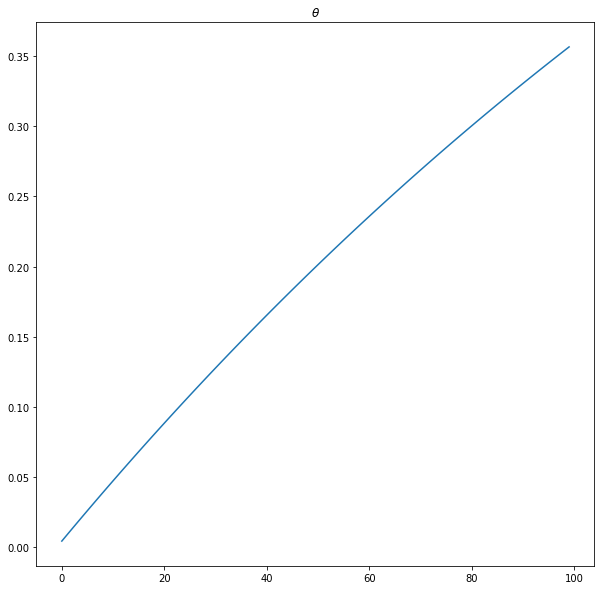

In [3]:
theta = 0
lr = 0.001
epochs = 100

z1_node = mul_node()
z2_node = minus_node()
z3_node = square_node()
c_node = cost_node()

loss_list = []
theta_list = []
for i in range(epochs):
    
    gradient_np = np.empty(0)
    theta_np = np.empty(0)
    
    for i in range(len(x_data)): 
        ##### Your Code(Forward Propagation) #####
        z1 = z1_node.forward(x_data[i], theta)
        z2 = z2_node.forward(y_data[i], z1)
        z3 = z3_node.forward(z2)
        ##### Your Code(Forward Propagation) #####
        gradient_np = np.append(gradient_np, np.array([z3]))
        
    cost = c_node.forward(gradient_np)
    loss_list.append(cost)
    dz = c_node.backward()
    
    for i in range(len(x_data)):
        ##### Your Code(Forward Propagation) #####
        z1 = z1_node.forward(x_data[i], theta)
        z2 = z2_node.forward(y_data[i], z1)
        z3 = z3_node.forward(z2)
        
        dz2 = z3_node.backward(dz[i])
        dy,dz1 = z2_node.backward(dz2)
        dx,dtheta = z1_node.backward(dz1)

        ##### Your Code(Forward Propagation) #####
        theta_np = np.append(theta_np, np.array([dtheta]))
    theta = theta - lr*np.mean(theta_np)
    theta_list.append(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(loss_list)
ax.set_title("loss")

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(theta_list)
ax.set_title(r"$\theta$")

**Expected Output:**
<img src="./images/1_2_image1.png" width = 400>
<img src="./images/1_2_image2.png" width = 400>

**Q1)Practice1-1에서부터 곡선으로 바뀐 이유를 분석하시오.**

**Q2)LR이 각각 0.001, 0.003, 0.01, 0.03, 0.1, 0.3일때의 결과를 비교하시오. 그리고 최적의 LR을 제시한 뒤 그 근거를 설명하시오.**